In [2]:
import pandas as pd

In [ ]:
# load final table
dfTable = pd.read_csv('../data/table.csv')
dfGLakes = pd.read_csv('../data/tableGL.csv')

# Methods

## Defining U.S. Production Boundaries

We define the production boundary for the timber asset account along two dimensions: tree species and spatial extent. The spatial extent is inferred from regions where timber markets are currently active. These regions indicate that buyers (forestry and logging operations) and sellers (timber owners) value the trees as assests when making management decisions. There are four primary U.S. timber markets; the south (11 states), northeast (mostly Maine), the lake states (Michigan, Minnesota, and Wisconsin), and the pacific northwest (Washington, Oregon, and Northern California). Each of these regions has specialized their timber markets to utilize their distinct tree species distribution, topology, and climatic conditions.

### The Southern U.S. Timber Market
    
The Southern U.S. market is dominated by yellow pine species (list them) including loblolly pine that makes up X% of total harvest. Because of the heavy concentration of yellow pine, standing timber prices are reported broadly with species distinctions falling into only two categories; pine and hardwood. Pine timber is utilized for building materials needing large sawlog size timber, and pulpwood for paper products relying on smaller trees harvested during thinning operations and residue from processing larger timber. Given these market characteristics, we stratify the standing timber biomass according to diameter size class estimated from the U.S. Forest Service's National Forest Inventory.

Timber Price data for the southern U.S. is curated by TimberMart South, a private firm providing price and market analysis across 11 states. Each state has two regions that generally divide the landscape between the coastal plain and the piedmont region. (what makes these regions different?). Similarly, the NFI estimates forest extent and condition across survey units designed to capture the climatic and topological differences betweent the coastal plain, piedmont, and Appalachian mountain range.

### The Great Lakes U.S. Timber Market

The Great Lakes region is comprised of the northern portions of Michigan, Minnesota, and Wisconsin. This region's timber market has formed around large, slow growing hardwood tree species.

### Stumpage vs Delivered Price

We use stumpage price because our objective is to value the timber asset prior to harvesting. Once timber is harvested the asset moves out of the timber account into the national account for forestry and logging where value is added through additional human and capital inputs. The delivered price is paid to loggers at the mill and differs from stumpage based on the cost of harvesting the trees and transporting them to the mill.

## Timber Regions

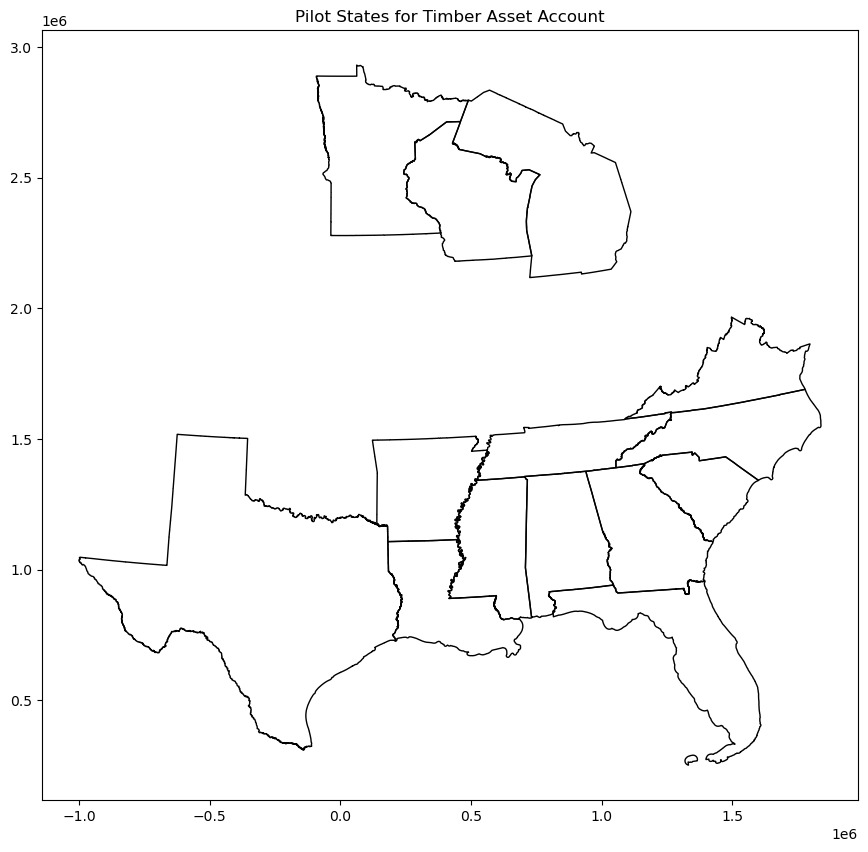

In [4]:
# draw a map of the counties with reported stumpage prices
# use cartopy to draw the map

import geopandas as gpd
import matplotlib.pyplot as plt

# define the states included in the pilots as pilotStates; use state_abbr
pilotStates = ['MI', 'MN', 'WI', 'TX', 'LA', 'MS',
                'AL', 'FL', 'GA', 'SC', 'NC', 'VA', 'TN', 'AR']


# Load the shapefiles locally
statesPath = '/Users/mihiarc/Work/spatial-boundaries/tl_2023_us_state/tl_2023_us_state.shp'
states = gpd.read_file(statesPath)

# filter the states and counties to only include the pilot states
states = states[states['STUSPS'].isin(pilotStates)]

# Change the CRS to Albers Equal Area
albers_crs = 'EPSG:5070'
states = states.to_crs(albers_crs)

# Plot the filtered states
fig, ax = plt.subplots(figsize=(15, 10))
states.plot(ax=ax, edgecolor='black', facecolor='none')

# Set plot title
plt.title('Pilot States for Timber Asset Account')

# Show the plot
plt.show()


## Timber Species

| FIA Code | Timber Species | Family | Market |
|:---:|:-----|--------|:----------------------|
| 012 | Balsim Fir | Pine | Great Lakes |
| 068 | eastern redcedar | Cypress | Great Lakes, South |
| 071 | tamarack | Pine | Great Lakes |
| 091 | Norway spruce | Pine | Great Lakes |
| 094 | white spruce | Pine | Great Lakes |
| 095 | black spruce | Pine | Great Lakes |
| 105 | jack pine | Pine |Great Lakes |
| 110 | shortleaf pine | Pine | South |
| 111 | slash pine | Pine | South |
| 121 | longleaf pine | Pine | South |
| 125 | red pine | Pine | Great Lakes |
| 126 | pitch pine | Pine | Great Lakes |
| 129 | eastern white pine | Pine | Great Lakes, South |
| 130 | Scotch (Scots) pine | Pine | Great Lakes |
| 131 | loblolly pine | Pine | South |
| 132 | Virginia pine | Pine | South |
| 221 | baldcypress | Cypress | South |
| 313 | boxelder | Maple | Great Lakes |
| 314 | black maple | Maple | Great Lakes, South |
| 316 | red maple | Maple | Great Lakes                                       
| 318 | sugar maple | Maple | Great Lakes, South |
| 371 | yellow birch | Birch | Great Lakes |
| 375 | paper birch | Birch | Great Lakes |
| 409 | mockernut hickory | Walnut | South |
| 402 | bitternut hickory | Walnut | Great Lakes, South |
| 403 | pignut hickory | Walnut | South |
| 404 | pecan | Walnut | South |
| 405 | shelbark hickory | Walnut | South |
| 407 | shagbark hickory | Walnut | South |
| 462 | hackberry | Elm | Great Lakes |
| 531 | American beech | Beech | Great Lakes |
| 541 | white ash | Olive | Great Lakes, South |
| 543 | black ash | Olive | Great Lakes |
| 544 | green ash | Olive | Great Lakes, South |
| 546 | blue ash | Olive | Great lakes, South |
| 601 | butternut | Walnut | South |
| 602 | black walnut | Walnut | Great Lakes, South |
| 611 | sweetgum | Witch-hazel | South |
| 621 | yellow-poplar | Magnolia | South |
| 651 | cucubertree | Magnolia | South |
| 652 | southern magnolia | Magnolia | South |
| 653 | sweetbay | Magnolia | South |
| 742 | eastern cottonwood | Willow | Great Lakes |
| 743 | bigtooth aspen | Willow | Great Lakes |
| 746 | quaking aspen | Willow | Great lakes |
| 762 | black cherry | Rose | Great Lakes, South |
| 802 | white oak | Beech | Great Lakes, South |
| 804 | swamp white oak | Beech | Great Lakes, South |
| 809 | northern pin oak | Beech | Great Lakes |
| 812 | southern red oak | Beech | South |
| 822 | overcup oak | Beech | South |
| 823 | bur oak | Beech | Great Lakes, South |
| 826 | chinkapin oak | Beech | Great Lakes |
| 830 | pin oak | Beech | South |
| 832 | chestnut oak | Beech | South |
| 833 | northern red oak | Beech | Great Lakes |
| 837 | black oak | Beech | Great Lakes, South |
| 951 | American basswood | Linden | Great Lakes |
| 972 | American elm | Elm | Great Lakes |
| 977 | rock elm | Elm | Great Lakes |


## Size Class

* In the southern U.S. diameter class include non-merchantable (pine only) (1"-4.9"), pulpwood (5"-11.9"), and sawtimber (12"+).
* The great lakes diameter classes differ only across large trees, either standard sawtimber size (20 - 30") or veneer size (30"+).

In [5]:
# what is the total volume of the timber stock in the southern region?
print(f"The total volume of the timber stock is {df['totalVolume'].sum():,.2f} billion cubic feet")

# what is the total value of the timber stock in the southern region?
print(f"The total value of the timber stock is ${df['totalValue'].sum():,.2f} (in billions)")

The total volume of the timber stock is 17,696.93 billion cubic feet
The total value of the timber stock is $124,796.63 (in billions)


In [4]:
dfSouth = pd.read_csv('../data/tableSouth.csv')

dfSouth.columns

Index(['stateAbbr', 'statecd', 'unitcd', 'priceRegion', 'spcd', 'spname',
       'spgrpcd', 'spclass', 'Product', 'size_class_code', 'size_class_range',
       'cuftPrice', 'volume', 'value'],
      dtype='object')

In [ ]:
# group by priceSpecies and product and use agg() to get summary statistics
# round to two decimal places
# sort by size_class_range
summary = table.groupby(['spclass', 'species']).agg({
    'pwVolume': 'sum',
    'pwValue': 'sum',
    'stVolume': 'sum',
    'stValue': 'sum'
}).reset_index()


# Convert volume and value to billions
summary['pwVolume'] = summary['pwVolume'] / 1000000000
summary['pwValue'] = summary['pwValue'] / 1000000000
summary['stVolume'] = summary['stVolume'] / 1000000000
summary['stValue'] = summary['stValue'] / 1000000000

# Round to two decimal places
summary = summary.round(2)

# Sort by priceSpecies, Product, and size_class_code
summary = summary.sort_values(by=['spclass', 'species'])

# add a column for total volume and total value
summary['totalVolume'] = summary['pwVolume'] + summary['stVolume']
summary['totalValue'] = summary['pwValue'] + summary['stValue']

# Sort by total value
summary = summary.sort_values('totalValue', ascending=False)

# save to csv
summary.to_csv('../data/final-table-v01.csv', index=False)
tableGL.to_csv('../data/tableGL.csv', index=False)
tableSouth.to_csv('../data/tableSouth.csv', index=False)
table.to_csv('../data/table.csv', index=False)

# Display the summary statistics
summary

,spclass,species,pwVolume,pwValue,stVolume,stValue,totalVolume,totalValue
16,Hardwood,hard maple,1039.01,0.00,852.65,36200.57,1891.66,36200.57
25,Hardwood,red oak,277.17,0.00,807.65,22025.61,1084.82,22025.61
28,Hardwood,soft maple,935.51,0.00,597.29,9258.19,1532.80,9258.19
45,Softwood,loblolly pine,1280.84,739.93,1100.50,6372.24,2381.34,7112.17
37,Hardwood,white oak,255.86,76.57,656.67,6669.26,912.53,6745.83
20,Hardwood,oak,266.77,22.42,572.97,4932.52,839.74,4954.94
1,Hardwood,aspen,1242.08,291.44,600.87,4143.31,1842.95,4434.75
48,Softwood,red pine,400.57,173.02,322.85,3937.31,723.42,4110.33
39,Hardwood,yellow-poplar,181.99,87.10,495.21,3943.57,677.20,4030.67
52,Softwood,white pine,152.23,0.00,369.71,3462.74,521.94,3462.74


In [6]:

# group by priceSpecies and product and use agg() to get summary statistics
# round to two decimal places
# sort by size_class_range
summarySouth = dfSouth.groupby(
    ['spclass', 'Product', 'size_class_code', 'size_class_range']
    ).agg({
    'volume': 'sum',
    'value': 'sum'
})

# Convert volume and value to billions
summarySouth['volume'] = summarySouth['volume'] / 1000000000
summarySouth['value'] = summarySouth['value'] / 1000000000

# Round to two decimal places
summarySouth = summarySouth.round(2)

# Sort by priceSpecies, Product, and size_class_code
summarySouth = summarySouth.sort_values(by=['spclass', 'Product', 'size_class_code'])

# Display the summary statistics
summarySouth

volume    value
spclass        Product   size_class_code size_class_range                 
Coniferous     Pulpwood  3               5.0-6.9           212.78   125.25
                         4               7.0-8.9           433.23   254.74
                         5               9.0-10.9          540.72   316.55
                         6               11.0-12.9         553.79   323.42
               Sawtimber 7               13.0-14.9         477.33  2733.18
                         8               15.0-16.9         361.69  2077.50
                         9               17.0-18.9         256.24  1474.62
                         10              19.0-20.9         160.61   924.25
                         11              21.0-22.9         101.62   584.33
                         12              23.0-24.9          64.39   371.24
                         13              25.0-26.9          39.63   227.68
                         14              27.0-28.9          20.27   115.51
                         15              29.0-30.9          14.65    83.77
                         16              31.0-32.9           8.45    47.54
                         17              33.0-34.9           3.74    20.64
                         18              35.0-36.9           2.44    14.22
Non-coniferous Pulpwood  3               5.0-6.9           162.62    91.68
                         4               7.0-8.9           239.80   131.40
                         5               9.0-10.9          296.01   158.36
                         6               11.0-12.9         333.58   175.10
               Sawtimber 7               13.0-14.9         366.97  2971.66
                         8               15.0-16.9         361.90  2920.38
                         9               17.0-18.9         334.71  2699.68
                         10              19.0-20.9         271.10  2180.98
                         11              21.0-22.9         204.84  1644.69
                         12              23.0-24.9         145.09  1168.06
                         13              25.0-26.9          98.75   794.75
                         14              27.0-28.9          68.69   552.87
                         15              29.0-30.9          38.10   305.24
                         16              31.0-32.9          29.80   240.15
                         17              33.0-34.9          16.90   135.79
                         18              35.0-36.9           9.91    80.48

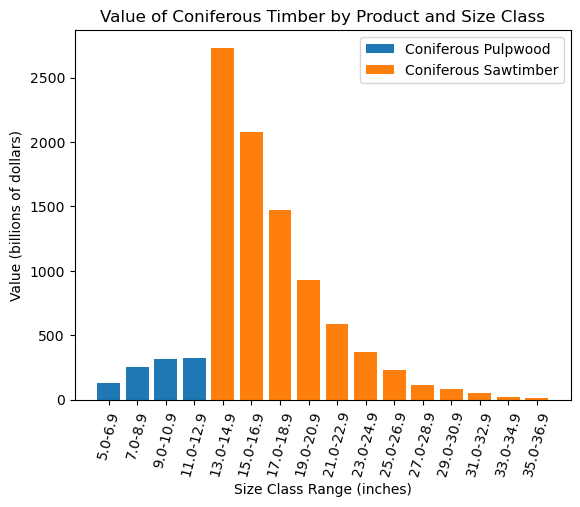

In [13]:
# plot a histogram of the value of timber by priceSpecies and product
import matplotlib.pyplot as plt

# create a figure and axis
fig, ax = plt.subplots()


# plot a histogram of the volume of timber by priceSpecies and product
for species in summaryConif.index.get_level_values('spclass').unique():
    for product in summaryConif.index.get_level_values('Product').unique():
        data = summaryConif.loc[(summaryConif.index.get_level_values('spclass') == species) &
                                (summaryConif.index.get_level_values('Product') == product)]
        ax.bar(data.index.get_level_values('size_class_range'), data['value'], label=species + ' ' + product)

# specify the x labels
xlabs = ['5.0-6.9', '7.0-8.9', '9.0-10.9', '11.0-12.9',
          '13.0-14.9', '15.0-16.9', '17.0-18.9', '19.0-20.9',
            '21.0-22.9', '23.0-24.9', '25.0-26.9', '27.0-29.9',
            '30.0-32.9', '33.0-34.9', '35-36.9']

# format the x labels to be more readable
# ax.set_xticks(range(len(xlabs)))
# ax.set_xticklabels(xlabs)

# space out the x labels
plt.xticks(rotation=75)

# set title and labels
ax.set_title('Value of Coniferous Timber by Product and Size Class')
ax.set_xlabel('Size Class Range (inches)')
ax.set_ylabel('Value (billions of dollars)')
ax.legend()

# display the plot
plt.show()

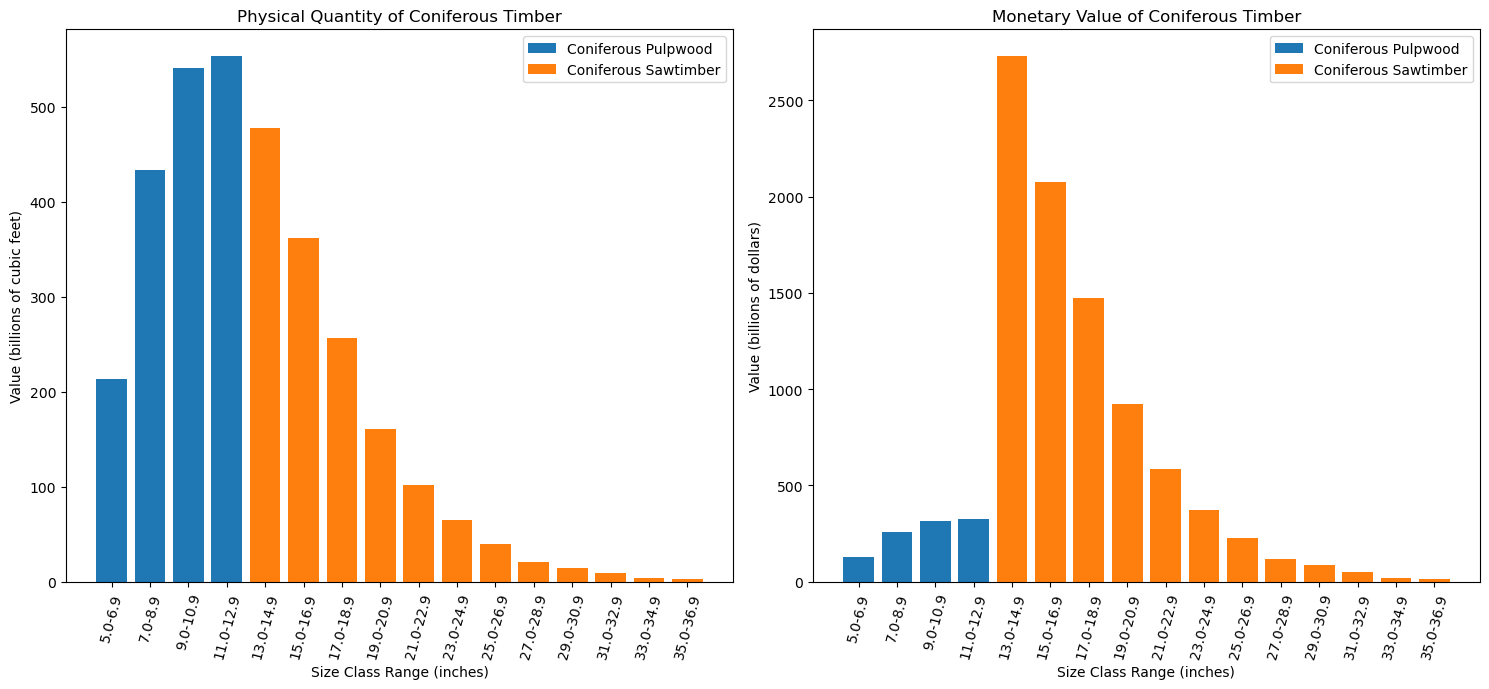

In [17]:
import matplotlib.pyplot as plt

summaryConif = summarySouth.loc[summarySouth.index.get_level_values('spclass') == 'Coniferous']

# Create a figure with two subplots arranged in a single row
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot the first histogram on the first subplot
for species in summaryConif.index.get_level_values('spclass').unique():
    for product in summaryConif.index.get_level_values('Product').unique():
        data = summaryConif.loc[(summaryConif.index.get_level_values('spclass') == species) &
                                (summaryConif.index.get_level_values('Product') == product)]
        ax1.bar(data.index.get_level_values('size_class_range'), data['volume'], label=species + ' ' + product)

# Set title and labels for the first subplot
ax1.set_title('Physical Quantity of Coniferous Timber')
ax1.set_xlabel('Size Class Range (inches)')
ax1.set_ylabel('Value (billions of cubic feet)')
ax1.legend()

# Plot the second histogram on the second subplot
for species in summaryConif.index.get_level_values('spclass').unique():
    for product in summaryConif.index.get_level_values('Product').unique():
        data = summaryConif.loc[(summaryConif.index.get_level_values('spclass') == species) &
                                (summaryConif.index.get_level_values('Product') == product)]
        ax2.bar(data.index.get_level_values('size_class_range'), data['value'], label=species + ' ' + product)

# Set title and labels for the second subplot
ax2.set_title('Monetary Value of Coniferous Timber')
ax2.set_xlabel('Size Class Range (inches)')
ax2.set_ylabel('Value (billions of dollars)')
ax2.legend()

# Rotate x-axis labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=75)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=75)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# # plot a histogram of the value of timber by priceSpecies and product
# import matplotlib.pyplot as plt

# # create a figure and axis
# fig, ax = plt.subplots()

# summaryOak = summarySouth.loc[summarySouth.index.get_level_values('priceSpecies') == 'Oak']

# # plot a histogram of the volume of timber by priceSpecies and product
# for species in summaryOak.index.get_level_values('priceSpecies').unique():
#     for product in summaryOak.index.get_level_values('Product').unique():
#         data = summaryOak.loc[(summaryOak.index.get_level_values('priceSpecies') == species) &
#                                 (summaryOak.index.get_level_values('Product') == product)]
#         ax.bar(data.index.get_level_values('size_class_code'), data['value'], label=species + ' ' + product)

# # specify the x labels
# xlabs = ['5.0-6.9', '7.0-8.9', '9.0-10.9', '11.0-12.9',
#           '13.0-14.9', '15.0-16.9', '17.0-18.9', '19.0-20.9',
#             '21.0-22.9', '23.0-24.9', '25.0-26.9', '27.0-29.9',
#             '30.0-32.9', '33.0-34.9', '35-36.9']

# # format the x labels to be more readable
# ax.set_xticks(range(len(xlabs)))
# ax.set_xticklabels(xlabs)

# # space out the x labels
# plt.xticks(rotation=75)

# # set title and labels
# ax.set_title('Value of Oak Timber by Product and Size Class')
# ax.set_xlabel('Size Class')
# ax.set_ylabel('Vallue (billions of dollars)')
# ax.legend()

# # display the plot
# plt.show()

In [ ]:
# # plot a histogram of the value of timber by priceSpecies and product

# # create a figure and axis
# fig, ax = plt.subplots()

# # plot a histogram of the value of timber by priceSpecies and product

# for species in summarySouth.index.get_level_values('priceSpecies').unique():
#     for product in summarySouth.index.get_level_values('Product').unique():
#         data = summarySouth.loc[(summarySouth.index.get_level_values('priceSpecies') == species) &
#                                 (summarySouth.index.get_level_values('Product') == product)]
#         ax.bar(data.index.get_level_values('size_class_code'), data['value'], label=species + ' ' + product)

# # specify the x labels
# xlabs = ['5.0-6.9', '7.0-8.9', '9.0-10.9', '11.0-12.9',
#           '13.0-14.9', '15.0-16.9', '17.0-18.9', '19.0-20.9',
#             '21.0-22.9', '23.0-24.9', '25.0-26.9', '27.0-29.9',
#             '30.0-32.9', '33.0-34.9', '35-36.9']

# # format the x labels to be more readable
# ax.set_xticks(range(len(xlabs)))
# ax.set_xticklabels(xlabs)

# # space out the x labels
# plt.xticks(rotation=75)

# # set title and labels
# ax.set_title('Value of Timber by Product and Size Class')
# ax.set_xlabel('Size Class')
# ax.set_ylabel('Value (billions of dollars)')
# ax.legend()

# # display the plot
# plt.show()

In [ ]:
# import geopandas as gpd
# import matplotlib.pyplot as plt
# import pandas as pd

# # Define pilot states
# pilotStates = ['AL', 'AR', 'FL', 'GA', 'LA',
#                'MS', 'NC', 'OK', 'SC', 'TN',
#                'TX', 'VA']

# # Load the shapefile locally
# shapefile_path = '/Users/mihiarc/Work/spatial-boundaries/tl_2023_us_state/tl_2023_us_state.shp'
# states = gpd.read_file(shapefile_path)

# # Filter the states shapefile to only include the pilot states
# states = states[states['STUSPS'].isin(pilotStates)]


# # Change the CRS to Albers Equal Area
# albers_crs = 'EPSG:5070'
# states = states.to_crs(albers_crs)


# # prepare the pine data for mapping
# # group by stateAbbr and sum the value
# timberValue = tableSouth.groupby('stateAbbr')['value'].sum().reset_index()

# # divide the value by 1 billion
# timberValue['value'] = timberValue['value'] / 1000000000

# # sort by value
# timberValue = timberValue.sort_values('value', ascending=False)

# # print the timberValue table; round to 2 decimal places
# print(f"Total Southern Timber Value by State (in billions):\n{timberValue.round(2)}")


In [ ]:
# # Merge the GeoDataFrame with the pine timber volume DataFrame
# # rename stateAbbr to STUSPS to match the states GeoDataFrame
# timberValue.rename(columns={'stateAbbr': 'STUSPS'}, inplace=True)
# states = states.merge(timberValue, on='STUSPS')


# # Plot the choropleth map
# fig, ax = plt.subplots(figsize=(15, 10))
# states.plot(column='value', ax=ax, legend=True,
#             legend_kwds={'label': "Southern Timber Value ($)",
#                          'orientation': "horizontal"},
#             cmap='GnBu', edgecolor='black')

# # # Set plot title
# plt.title('Timber Value Across Southern Pilot States')

# # # Show the plot
# plt.show()